# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("done")

done


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather = []
lat = []
lng = []
max_temp = []
humi = []
cloud = []
wind = []
date = []


for city in cities:
    
    try:
        target_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
        weather_data = requests.get(target_url).json()
        weather.append(weather_data)
        lat.append(weather_data['coord']['lat'])
        lng.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])
        humi.append(weather_data['main']['humidity'])
        cloud.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        date.append(weather_data['dt'])
        print(city + ' ' + str(weather_data['sys']['id']))
    except:
        print('skip')




skip
constancia 2010279
hilo 7881
ushuaia 8303
skip
skip
klaksvik 1596
hermanus 2006131
saint george 5832
albany 19530
ribeira grande 6883
alofi 7306
skip
skip
vaini 7285
skip
skip
kaeo 2012217
georgetown 9429
nikolskoye 8926
skip
tautira 7318
skip
skip
ilulissat 165
skip
makakilo city 7868
cabo san lucas 7151
punta arenas 8487
cape town 1899
skip
hobart 9545
iqaluit 797
pisco 8691
skip
skip
skip
skip
skip
mataura 2008959
skip
mount gambier 9560
santa barbara 4558
skip
clyde river 776
skip
jamestown 4588
skip
mar del plata 8305
skip
manacor 6423
san patricio 3705
skip
kapaa 7873
skip
skip
port elizabeth 1973
skip
east london 1912
souillac 2061
bluff 2008959
skip
skip
bethel 3888
santa rosa 2037715
russell 4765
skip
homer 7709
skip
skip
saldanha 1943
praia 2462
skip
skip
skip
skip
lata 2001739
rio grande 8408
otane 2038417
skip
new norfolk 2031307
carnarvon 9505
oistins 8772
irawan 8186
skip
aktau 8834
skip
asau 2033571
skip
cayenne 8669
skip
puerto del rosario 2371
husavik 83
skip
skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
df=pd.DataFrame({'Lat': lat, 'Long': lng, 'Max Temp': max_temp, 'Humidity': humi, 
                 'Cloudiness':cloud, 'Wind Speed':wind, 'Date':date})  
df.to_csv(r'weather.csv', index=False)
df


,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,24.2231,-107.1869,291.48,98,34,1.25,1619611139
1,19.7297,-155.0900,296.15,78,90,1.54,1619611139
2,-54.8000,-68.3000,275.15,100,40,4.63,1619610967
3,69.4865,88.3972,274.05,99,99,3.95,1619611140
4,39.0500,-27.9833,288.27,80,100,6.96,1619611140
...,...,...,...,...,...,...,...
569,55.5281,41.1053,280.95,66,98,4.06,1619611332
570,41.1239,-100.7654,281.15,93,90,6.01,1619611099
571,64.8569,-147.8028,272.15,59,75,2.10,1619611332
572,-8.4667,140.3333,299.35,85,73,5.32,1619611270


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [117]:
humi_df = df[df['Humidity'] <= 100]
humi_df

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-23.1203,-134.9692,298.45,70,1,4.34,1619558019
1,-15.1961,12.1522,297.45,68,5,4.30,1619557765
2,37.7167,-25.4333,288.15,82,75,4.63,1619558019
3,-2.9248,-39.9167,299.65,78,19,5.78,1619557985
4,40.6995,-99.0815,290.15,67,90,8.75,1619557759
...,...,...,...,...,...,...,...
561,-6.1761,143.6513,285.53,96,80,1.38,1619558503
562,54.4333,113.6000,266.15,55,100,3.17,1619558503
563,-3.2175,40.1191,299.56,81,93,3.78,1619558504
564,64.5011,-165.4064,277.15,56,1,1.54,1619558504


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

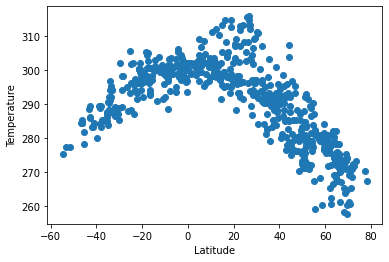

In [7]:
# Create a Scatter Plot for temperature vs latitude
x_values = lat
y_values = max_temp
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

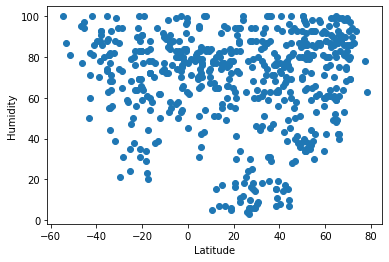

In [8]:
# Create a Scatter Plot for temperature vs latitude
x_values = lat
y_values = humi
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

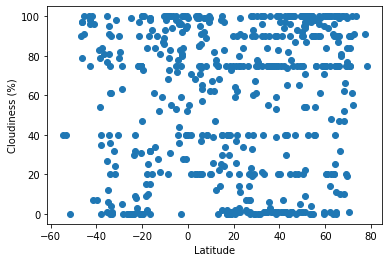

In [9]:
# Create a Scatter Plot for temperature vs latitude
x_values = lat
y_values = cloud
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

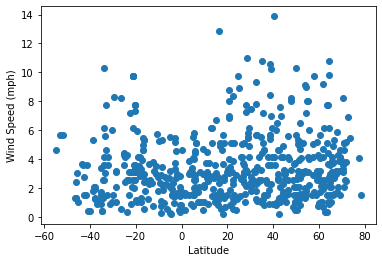

In [10]:
# Create a Scatter Plot for temperature vs latitude
x_values = lat
y_values = wind
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [17]:
north_df = df[df['Lat']>0]
south_df = df[df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7334090541060931


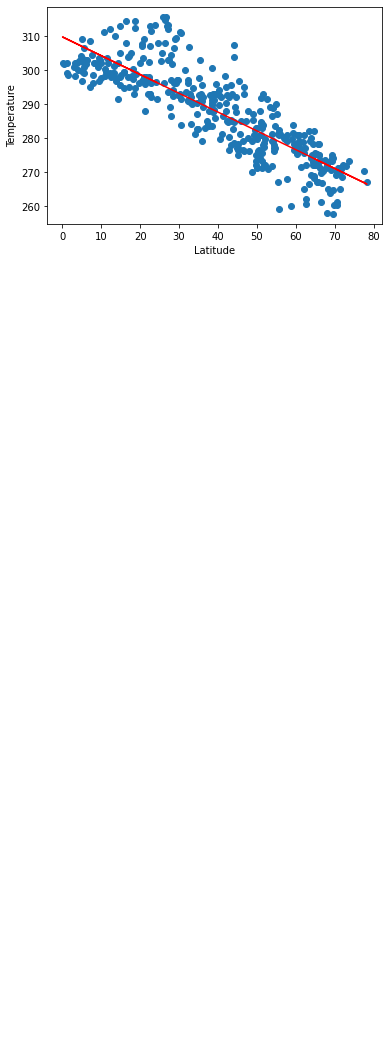

In [33]:
#north_lat = []
#north_max_temp = []

#for row in north_df:
#    north_lat.append('Lat')
#    north_max_temp.append('Max Temp')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Max Temp'])

# Get regression values
regress_values = np.multiply(north_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(north_df['Lat'], north_df['Max Temp'])
plt.plot(north_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6198650110855494


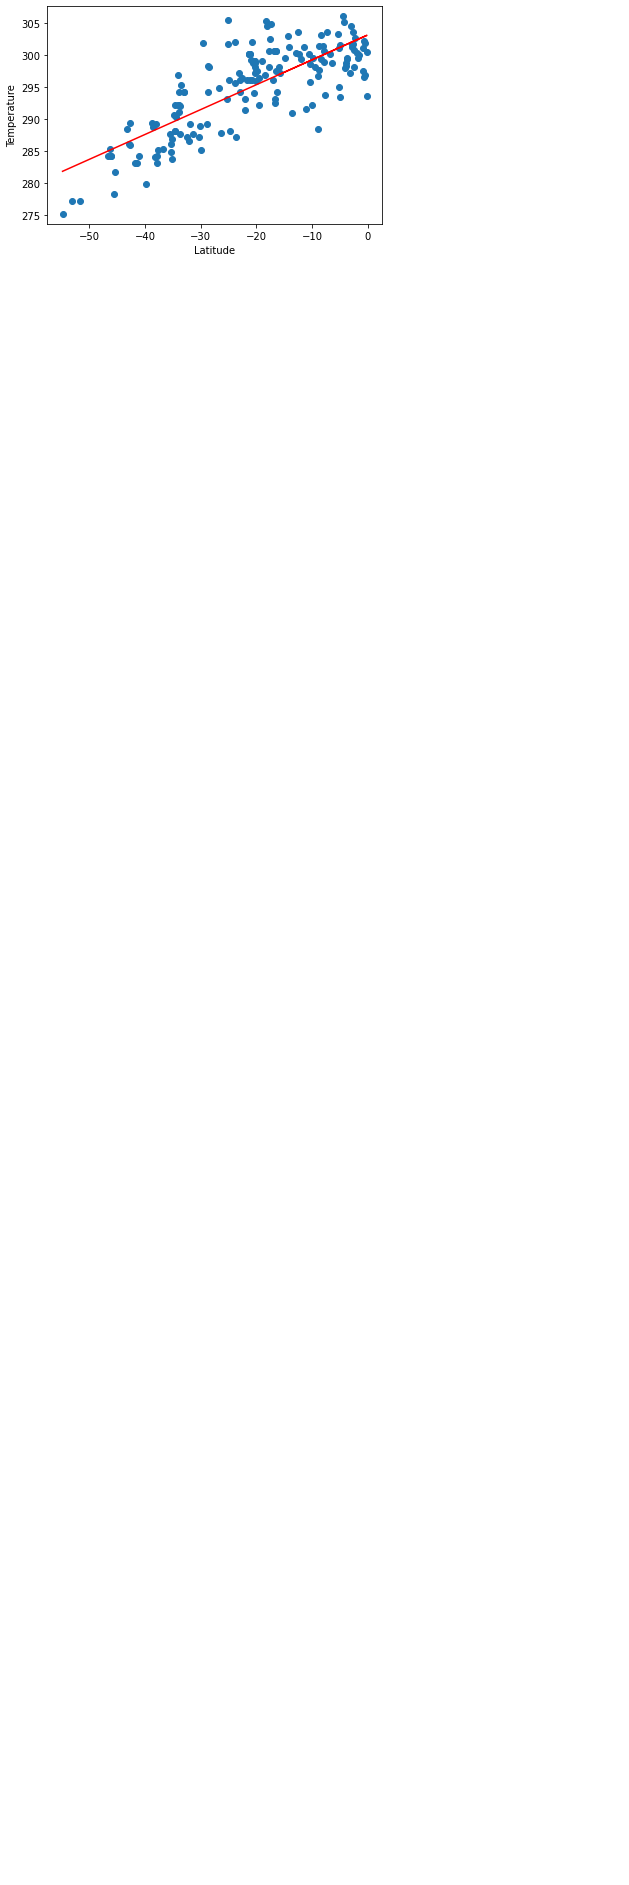

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Max Temp'])

# Get regression values
regress_values = np.multiply(south_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(south_df['Lat'], south_df['Max Temp'])
plt.plot(south_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03300299365957873


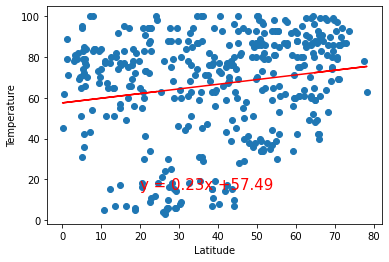

In [27]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Humidity'])

# Get regression values
regress_values = np.multiply(north_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(north_df['Lat'], north_df['Humidity'])
plt.plot(north_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004305459821612975


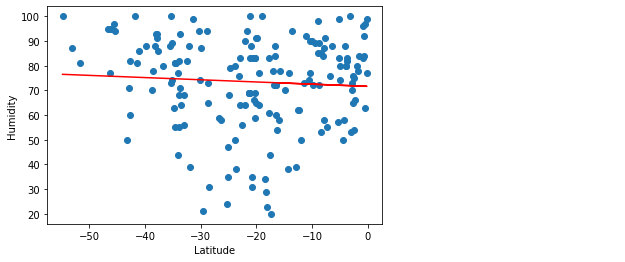

In [28]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Humidity'])

# Get regression values
regress_values = np.multiply(south_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(south_df['Lat'], south_df['Humidity'])
plt.plot(south_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03064382980521392


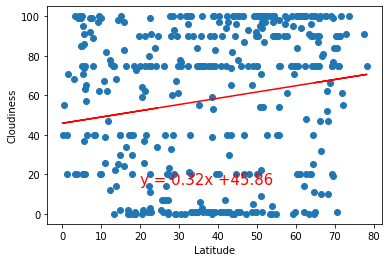

In [29]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Cloudiness'])

# Get regression values
regress_values = np.multiply(north_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(north_df['Lat'], north_df['Cloudiness'])
plt.plot(north_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03133337385526598


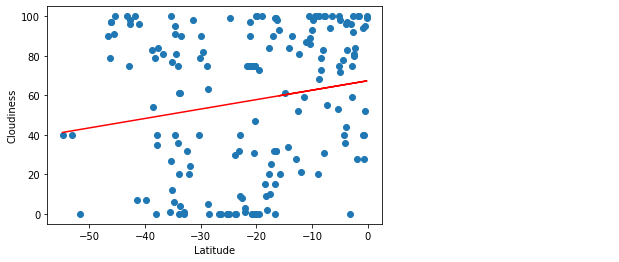

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Cloudiness'])

# Get regression values
regress_values = np.multiply(south_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(south_df['Lat'], south_df['Cloudiness'])
plt.plot(south_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00608851244253922


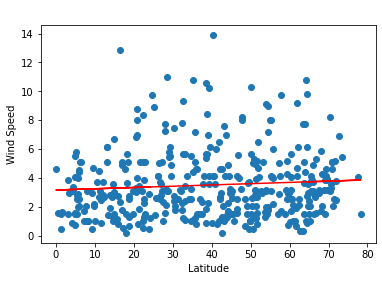

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'], north_df['Wind Speed'])

# Get regression values
regress_values = np.multiply(north_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(north_df['Lat'], north_df['Wind Speed'])
plt.plot(north_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.007962168972216882


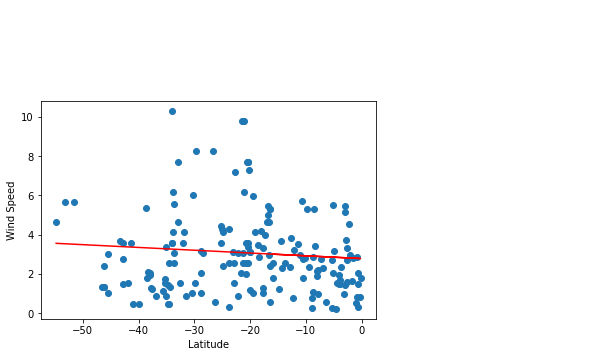

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'], south_df['Wind Speed'])

# Get regression values
regress_values = np.multiply(south_df['Lat'], slope) + intercept
#print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot

plt.scatter(south_df['Lat'], south_df['Wind Speed'])
plt.plot(south_df['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()